In [25]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
%matplotlib inline

In [26]:
train = pd.read_csv('datadata1.csv') # reading the csv file
train.head() # printing first five rows of the file

,Image,Emotion
0,01920_horror_detect.jpg,Fear
1,11920_horror_detect.jpg,Fear
2,21920_horror_detect.jpg,Fear
3,31920_horror_detect.jpg,Fear
4,41920_horror_detect.jpg,Fear


In [27]:
train.columns

Index(['Image', 'Emotion'], dtype='object')

In [28]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/Users/peyamowar/Peya_emotion_detection/datadata/'+str(train['Image'][i]),target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 470/470 [00:04<00:00, 103.42it/s]


In [29]:
X.shape

(470, 400, 400, 3)

In [30]:
from keras.utils import to_categorical
y = train.drop(['Image'],axis=1)
y.shape
le=LabelEncoder()
ds=y.apply(le.fit_transform)
y=np.array(ds)
print(np.unique(y))
print(le.inverse_transform([0,1,2,3,4,5]))
y=to_categorical(y)
print(y.shape)

[0 1 2 3 4 5 6 7 8]
['Anger' 'Disgust' 'Fear' 'Happy' 'Joy' 'Love']
(470, 9)


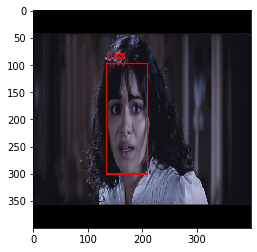

In [31]:
plt.imshow(X[2])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

#CNN
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

In [33]:
#CNN with LSTM
from keras.layers import LSTM,Reshape
from keras.layers import TimeDistributed
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.add(Reshape((-1,6)))
model.add(LSTM(50, activation='relu', return_sequences="True"))
#model.add(LSTM(10, stateful=True))
model.add(Flatten())
model.add(Dense(9, activation='softmax'))

#VGG16
from keras.applications.vgg16 import VGG16
model = Sequential()
model.add(VGG16(include_top='False', input_shape=(224,224,3)))
model.add(Dense(256, activation='softmax'))
model.add(Dropout(0.25))
model.add(Dense(9, activation='softmax'))

#InceptionResNetV2
from keras.applications.inception_resnet_v2 import InceptionResNetV2
model = Sequential()
model.add(InceptionResNetV2(include_top='False', input_shape=(299,299,3)))
model.add(Dense(256, activation='softmax'))
model.add(Dropout(0.25))
model.add(Dense(9, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 93, 93, 64)       

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test), batch_size=32)

Train on 423 samples, validate on 47 samples
Epoch 1/2
320/423 [=====================>........] - ETA: 20s - loss: 2.1858 - accuracy: 0.1500

In [15]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 13s 270ms/step


[2.113418695774484, 0.19148936867713928]

[[0.13235901 0.10797644 0.11509626 0.10301153 0.10018571 0.10175962
  0.13249882 0.10679535 0.10031722]]
['Joy']


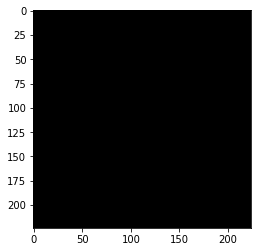

In [19]:
mg = image.load_img('/Users/peyamowar/Peya_emotion_detection/datadata/434missionmangal_drama_detect.jpg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,224,224,3))
print(proba)
plt.imshow(img)
print(le.inverse_transform([np.argsort(proba[0])[0]]))